In [2]:
import numpy as np                     # linear algebra
import pandas as pd                    # data processsing, CSV file I/O
import seaborn as sns                  # for creating plots
import matplotlib.ticker as mtick      # for specifying access tick format
import matplotlib.pyplot as plt        

sns.set(style = 'white')

# input data files are available in the "../input/" directory.

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input'

## Let us read the data file in the python notebook

In [3]:
telecom_cust = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telecom_cust.values

array([['7590-VHVEG', 'Female', 0, ..., 29.85, '29.85', 'No'],
       ['5575-GNVDE', 'Male', 0, ..., 56.95, '1889.5', 'No'],
       ['3668-QPYBK', 'Male', 0, ..., 53.85, '108.15', 'Yes'],
       ...,
       ['4801-JZAZL', 'Female', 0, ..., 29.6, '346.45', 'No'],
       ['8361-LTMKD', 'Male', 1, ..., 74.4, '306.6', 'Yes'],
       ['3186-AJIEK', 'Male', 0, ..., 105.65, '6844.5', 'No']],
      dtype=object)

### Let's explore the data to see if there are any missing values.

In [6]:
# Checking the data types of all the columns
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Converting Total charges
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors = 'coerce')
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

###### After looking at the above output, we can say that there are 11 missing values for TotalCharges. Let us remove these 11 rows from our data set.

In [9]:
# Removing missing values
telecom_cust.dropna(inplace = True)

#remove customer IDs from the data set
df2 = telecom_cust.iloc[:,1:]

#Convert the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace = 'Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace = 'No', value=0,inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

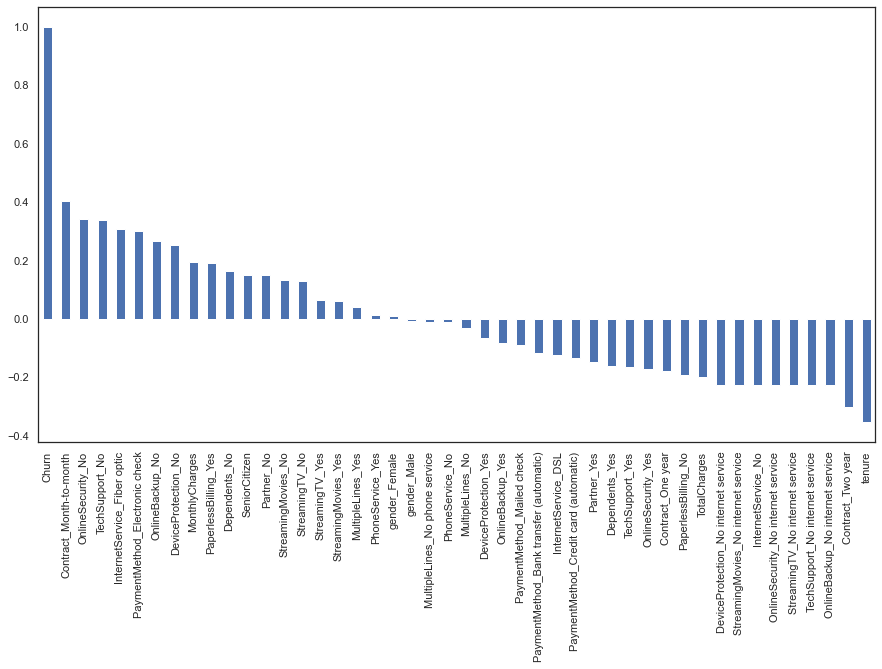

In [10]:
# Get correlation of "Churn" with other variables:

#plt.figure(figsize=(15,8))
#df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

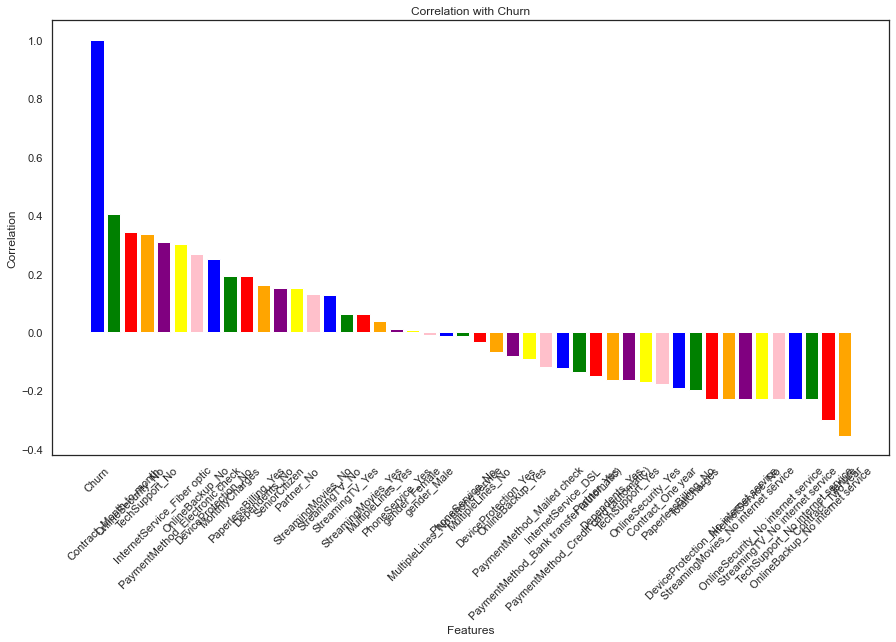

In [11]:
# Define the color map
colors = ['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'pink']

# Sort the correlation values in descending order
corr_values = df_dummies.corr()['Churn'].sort_values(ascending=False)

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the bar chart with different colors for each bar
ax.bar(corr_values.index, corr_values, color=colors[:len(corr_values)])

# Set the labels and title
ax.set_xlabel('Features')
ax.set_ylabel('Correlation')
ax.set_title('Correlation with Churn')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()